In [1]:
### Modified by Ilker Parmaksiz ## 
## Jan 27 2025 ##
## Fix the code and added some quick examples in case needed.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot as up
import pandas as pd

# Read File Information

In [9]:
#Dir="/home/argon/Projects/Ilker/QPixSemiAnalytical/input/"
Dir="/home/argon/Downloads/"
fileName = "SUPERNOVA_NEUTRINO_Timing1_SemiAnalytical.root"
FilePath=Dir+fileName
f=up.open(FilePath)
Photons=f["Photons"]
Event=f["Event"]
Geometry=f["Geometry"]

In [10]:
### File Structure ###
## It could help for analysis
## Geometry Information
print("### Geometry Folder ###")
print(Geometry.keys())
print("\n")
#### Event ##  
## General Event Information
print("### Event Folder ###")
print(Event.keys())
print("\n")
## Results from QPIXSemiAnalatical Method Photons Information
print("### Photon Folder ###")
print(Photons.keys())

### Geometry Folder ###
['Distance', 'Angle', 'DistanceAverage', 'AngleAverage', 'Channels', 'VisibilityVector', 'VisibilityAtVertex']


### Event Folder ###
['EventMeanX', 'EventMeanY', 'EventMeanZ', 'InitialParticleEnergy', 'TotalEdep', 'InitialParticlePDG', 'InteractionTime', 'PrimaryParticleEnergy', 'PrimaryParticlePDG', 'PrimaryParticlePx', 'PrimaryParticlePy', 'PrimaryParticlePz', 'InteractionVertexX', 'InteractionVertexY', 'InteractionVertexZ', 'LightYield', 'NumberOfPhotons', 'NumberOfElectrons', 'DepositedEnergy']


### Photon Folder ###
['eventID', 'SavedPhotons', 'GeneratedPhotons', 'DetectedPhotons', 'PhotonsPerEdep']


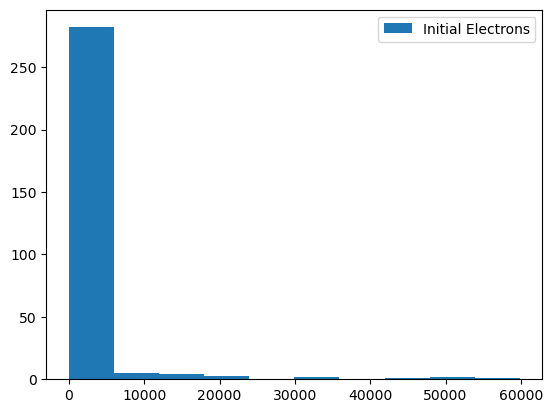

In [11]:
## Initial Electrons
evt=0
plt.hist(Event["NumberOfElectrons"].array()[evt],label="Initial Electrons")
plt.legend()
plt.show()

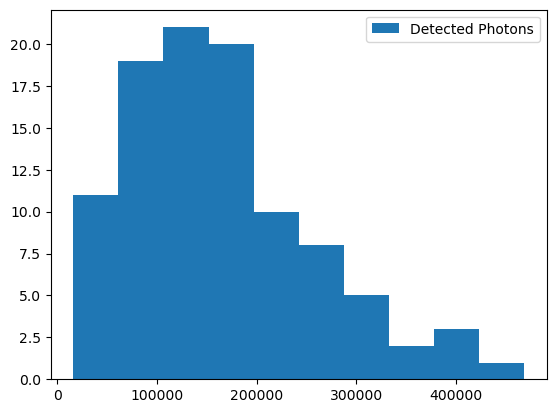

In [12]:
## AllEvents for all Event
plt.hist(Photons["DetectedPhotons"].array(),label="Detected Photons")
plt.legend()

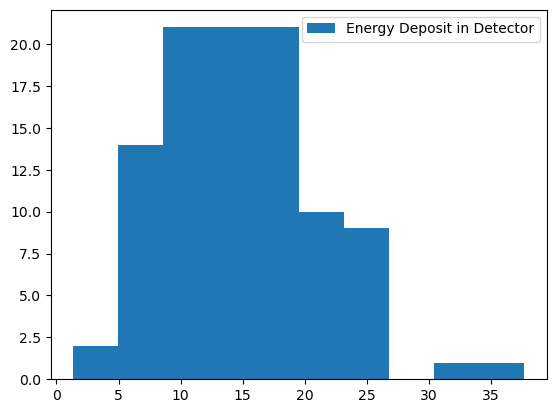

In [13]:
## Energy Deposit
#plt.hist(Event["InitialParticleEnergy"].array()[evt],label="Initial Energy")
plt.hist(Event["TotalEdep"].array(),label="Energy Deposit in Detector")

plt.legend()
plt.show()

In [14]:
SavedPhotons=Photons["SavedPhotons"].array()
#SavedPhotons=
TotalPhotonsPerOpDet=np.array([]) #List containing the total number of photons detected by each channel.
Times=np.array([]) #List containing all time ticks at which a photons was detected.
for channel in range(0, len(SavedPhotons)):
    TotalPhotonsPerOpDet=np.append(TotalPhotonsPerOpDet,len(SavedPhotons[channel]))
    for detected in range(0,len(SavedPhotons[channel])):
        if(len(SavedPhotons[channel][detected])!=0):
            Times=np.append(Times,SavedPhotons[channel][detected])
        else:
            Times=np.append(Times,0)


KeyboardInterrupt: 

[]

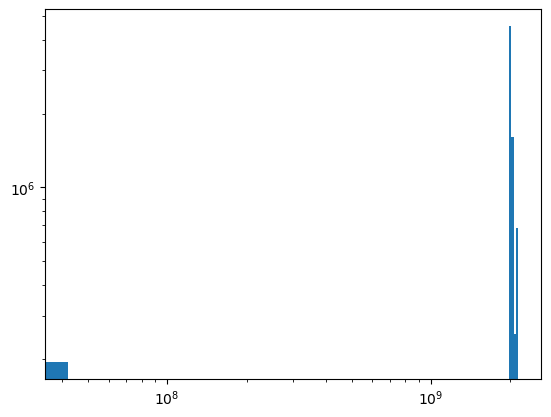

# Plot event signal

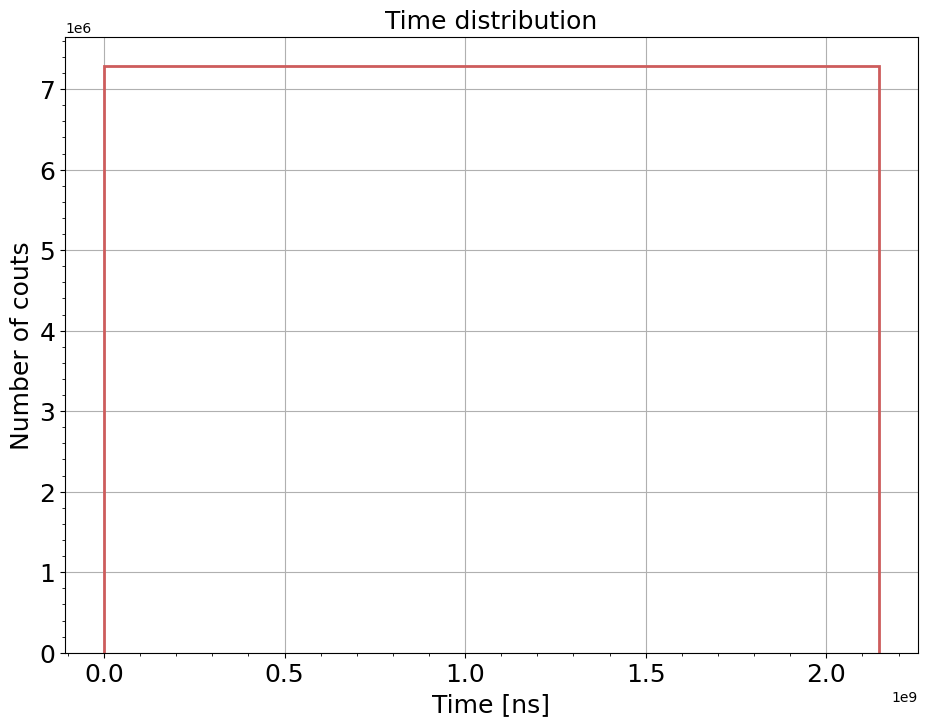

In [15]:

maxTime=np.max(Times) #Maximum time range
fig, ax = plt.subplots(1, figsize=(11,8))

ax.hist(Times, histtype='step', lw=2, bins=[0,maxTime], color='indianred')
ax.tick_params(axis='both', which='major', labelsize=18)
ax.minorticks_on()
ax.set_ylabel('Number of couts', fontsize=18)
ax.set_xlabel('Time [ns]', fontsize=18)
ax.set_title('Time distribution',fontsize=18)
ax.grid()